In [1]:
import sys
!{sys.executable} -m pip install opencv-python

In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
import random

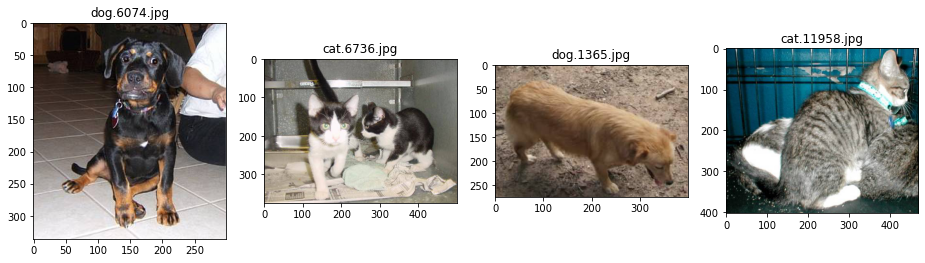

In [4]:
#plotting random images from dataset

plt.figure(figsize=(20,20))

train_folder = "C:/Users/danie/Downloads/Cats vs Dogs/train"

for i in range(1,5):
    file=random.choice(os.listdir(train_folder))
    image_path = os.path.join(train_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
    
    

In [5]:
import fnmatch

In [6]:
IMG_WIDTH=200
IMG_HEIGHT=200

def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    
    for file in os.listdir(img_folder):
        image_path= os.path.join(img_folder,file)
        image=cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (IMG_HEIGHT,IMG_WIDTH),interpolation =cv2.INTER_AREA)
        image = np.array(image)
        image=image.astype('float32')
        image /=255
        img_data_array.append(image)
        if 'cat' in file:
            class_name.append("cat")
        else:
            class_name.append("dog")
    return img_data_array, class_name
        
img_data,class_name = create_dataset(r"C:/Users/danie/Downloads/Cats vs Dogs/train")

In [9]:
len(img_data)

In [10]:
len(class_name)

25000

In [11]:
xtrain,ytrain = img_data,class_name

In [12]:
len(xtrain)

25000

In [13]:
target_dict ={k:v for v,k in enumerate(np.unique(class_name))}
target_dict

{'cat': 0, 'dog': 1}

In [14]:
target_val = [target_dict[class_name[i]]for i in range(len(class_name))]

In [65]:
len(target_val)

25000

In [70]:
target_val[-2:-1]

[1]

In [18]:
model= tf.keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(63,(3,3),activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(2,activation='softmax'))

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy')>0.999:
            print("n\Reached 99.9% accuracy so stopping training!")
            self.model.stop_training=True

In [26]:
history = model.fit(x=np.array(img_data,np.float32),y=np.array(target_val,np.float32), epochs=5,callbacks=myCallback(),verbose=1)

Epoch 1/5
782/782 [==============================] - 390s 487ms/step - loss: 0.6586 - accuracy: 0.6390
Epoch 2/5
782/782 [==============================] - 377s 482ms/step - loss: 0.5146 - accuracy: 0.7457
Epoch 3/5
782/782 [==============================] - 376s 481ms/step - loss: 0.4094 - accuracy: 0.8121
Epoch 4/5
782/782 [==============================] - 377s 482ms/step - loss: 0.2934 - accuracy: 0.8720
Epoch 5/5
782/782 [==============================] - 379s 485ms/step - loss: 0.1624 - accuracy: 0.9348


In [27]:
model.save("C:/Users/danie/Downloads/Cats vs Dogs")

INFO:tensorflow:Assets written to: C:/Users/danie/Downloads/Cats vs Dogs\assets


INFO:tensorflow:Assets written to: C:/Users/danie/Downloads/Cats vs Dogs\assets


In [29]:
def create_dataset2(img_folder):
    img_data_array=[]
    for file in os.listdir(img_folder):
        image_path= os.path.join(img_folder,file)
        image=cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (IMG_HEIGHT,IMG_WIDTH),interpolation =cv2.INTER_AREA)
        image = np.array(image)
        image=image.astype('float32')
        image /=255
        img_data_array.append(image)
    return img_data_array


test = create_dataset2(r"C:/Users/danie/Downloads/Cats vs Dogs/test1")

In [30]:
len(test)

12500

In [34]:
prediction= model.predict(np.array(test,np.int32))

391/391 [==============================] - 47s 121ms/step


In [32]:
len(prediction)

12500

In [35]:
prediction[:10]

array([[9.7441441e-01, 2.5585612e-02],
       [9.9204016e-01, 7.9599172e-03],
       [8.7802327e-01, 1.2197678e-01],
       [9.8076791e-01, 1.9232128e-02],
       [9.9828017e-01, 1.7198347e-03],
       [9.9580503e-01, 4.1949833e-03],
       [9.9719775e-01, 2.8022565e-03],
       [9.9993098e-01, 6.9056354e-05],
       [9.9719775e-01, 2.8022565e-03],
       [9.9748921e-01, 2.5107374e-03]], dtype=float32)

In [39]:
test_folder = r"C:/Users/danie/Downloads/Cats vs Dogs/test1"

In [37]:
print(f"Prediction is {class_name[index]}")

Prediction is cat


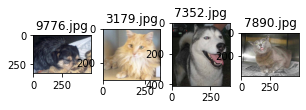

In [48]:
for i in range(1,5):
    file=random.choice(os.listdir(test_folder))
    image_path = os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)
    

In [44]:
index = np.argmax(prediction[9666])
print(f"Prediction is {class_name[index]}")


Prediction is cat


In [57]:
index = np.argmax(prediction[3178])
print(f"Prediction is {class_name[index]}")

Prediction is cat


In [49]:
index = np.argmax(prediction[7351])
print(f"Prediction is {class_name[index]}")

Prediction is cat


In [58]:
index = np.argmax(prediction[7889])
print(f"Prediction is {class_name[index]}")

Prediction is cat


In [55]:
count = np.count_nonzero(prediction == 1)

In [56]:
count

74